In [303]:
import numpy as np
from plot_params import *
from copy import deepcopy
from scipy.spatial.distance import cdist
from scipy.optimize import minimize

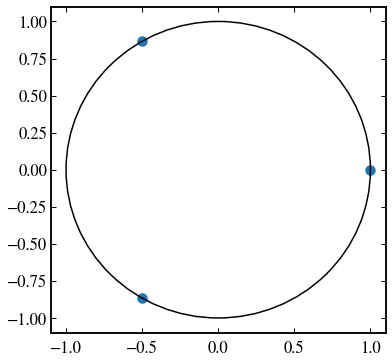

In [314]:
# generate particles
n = 3
r = np.random.rand(n)
theta = np.random.rand(n) * 2 * np.pi
r = np.array([1, 1, 1])
theta = np.array([0, 2 / 3 * np.pi, 4 / 3 * np.pi])
x = np.cos(theta) * r
y = np.sin(theta) * r
pos = np.stack((x, y), axis=1)

# plot them on a circle 
pos = np.stack((x, y), axis=1)
plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1])
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)

In [321]:
pos1, pos2

(array([[ 1.       ,  0.       ],
        [-0.5      ,  0.8660254],
        [-0.5      , -0.8660254]]),
 array([[-5.00000000e-01,  8.66025404e-01],
        [-5.00000000e-01, -8.66025404e-01],
        [ 1.00000000e+00, -8.88178420e-16]]))

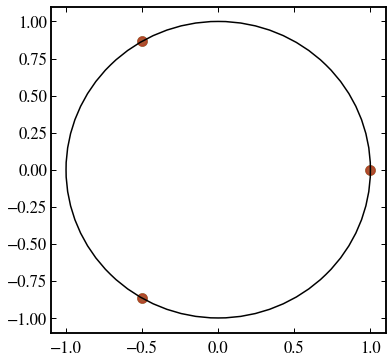

In [325]:
standard_pos = pos
# pos = rotation(pos, np.random.rand() * 2 * np.pi) + np.random.rand(3, 2) * 0.1

pos1 = rotation(standard_pos, 0)
pos2 = rotation(standard_pos, np.pi * 2 / 3)
pos3 = rotation(standard_pos, np.pi * 4 / 3)

# plot them on a circle 
plt.figure(figsize=(6, 6))
plt.scatter(pos1[:, 0], pos1[:, 1], alpha=0.6)
plt.scatter(pos2[:, 0], pos2[:, 1], alpha=0.6)
plt.scatter(pos3[:, 0], pos3[:, 1], alpha=0.6)
plt.scatter(standard_pos[:, 0], standard_pos[:, 1], color='tab:red', alpha=0.6)
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)

In [312]:
def rotation(pos, theta_rotation):
    # get polar coordinates
    x = pos[:, 0]
    y = pos[:, 1]
    r = np.sqrt(x ** 2 + y ** 2)
    theta = np.arctan2(y, x)

    # add an angle
    theta = theta + theta_rotation

    # back to cartesian
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    pos = np.stack((x, y), axis=1)

    return pos


def difference_score(theta_rotation, standard_pos, pos):
    # rotate
    pos = rotation(pos, theta_rotation)

    # calculate difference to standard
    dist = cdist(standard_pos, pos, 'euclidean')
    lower_triangle = np.tril(dist, k=-1)
    dist_score = lower_triangle.sum()

    return sum([dist[:, i] for i in range(pos.shape[0])])
    return np.trace(dist)
    return dist_score

scores = []
radians = np.linspace(0, 2 * np.pi, 1000)

for r in radians:
    ds = difference_score(r, standard_pos, pos)
    scores.append(ds)

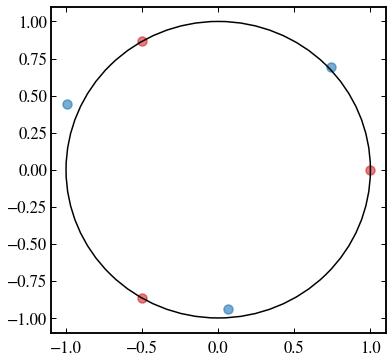

In [313]:
plot_pos = rotation(pos, 0)
plot_pos = rotation(pos, np.argmin(scores))

# plot them on a circle 
plt.figure(figsize=(6, 6))
plt.scatter(plot_pos[:, 0], plot_pos[:, 1], alpha=0.6)
plt.scatter(standard_pos[:, 0], standard_pos[:, 1], color='tab:red', alpha=0.6)
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)
plt.show()

In [308]:
# # rotate the circle 

# # get polar coordinates
# x = pos[:, 0]
# y = pos[:, 1]
# r = np.sqrt(x ** 2 + y ** 2)
# theta = np.arctan2(y, x)

# # add an angle
# theta = theta + np.pi / 3 * 2

# # back to cartesian
# x = np.cos(theta) * r
# y = np.sin(theta) * r
# new_pos = np.stack((x, y), axis=1)

# # calculate difference to standard
# dist = cdist(standard_pos, new_pos, 'euclidean')
# lower_triangle = np.tril(dist, k=-1)
# dist_score = lower_triangle.sum()
# print(dist_score)
# print(np.trace(dist))

# # plot them on a circle 
# plt.figure(figsize=(6, 6))
# plt.scatter(new_pos[:, 0], new_pos[:, 1], alpha=0.6)
# plt.scatter(standard_pos[:, 0], standard_pos[:, 1], color='tab:red', alpha=0.6)
# circle = plt.Circle((0, 0), 1, fill=False)
# plt.gca().add_patch(circle)